## Import Modules


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
from plotly.offline import iplot, plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Loading the dataset

In [2]:
Dataset = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
##statistical info
Dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
##datatype info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

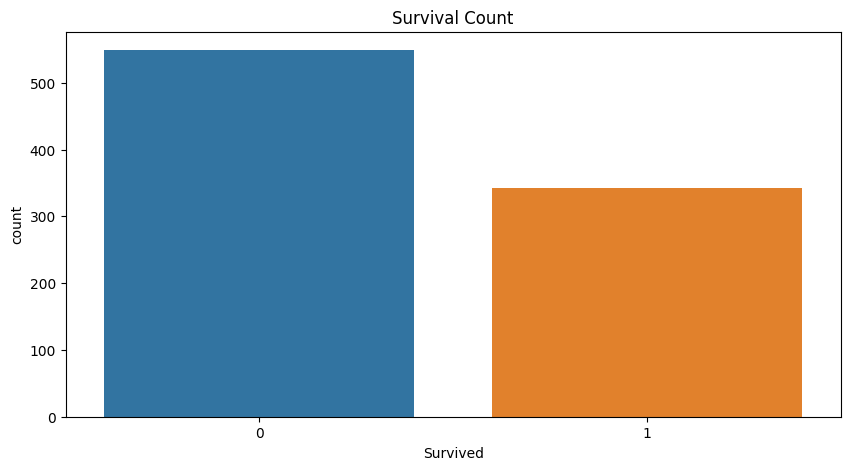

In [5]:
## categorical attributes
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=Dataset)
plt.title('Survival Count')
plt.show()

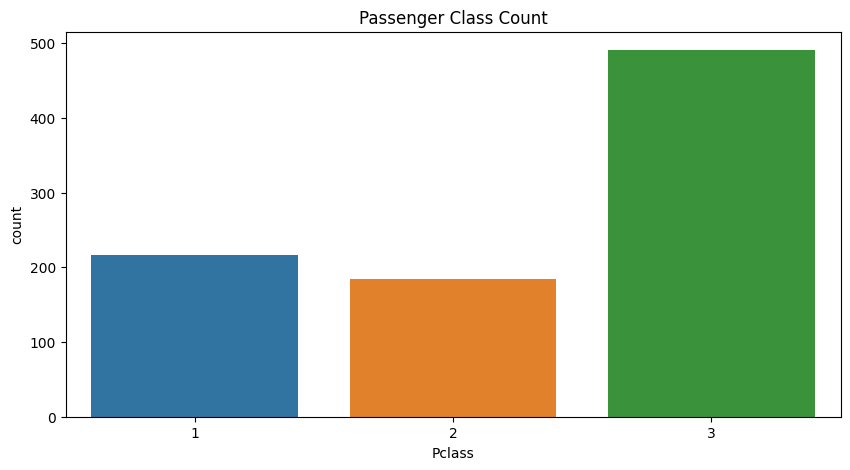

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=Dataset)
plt.title('Passenger Class Count')
plt.show()

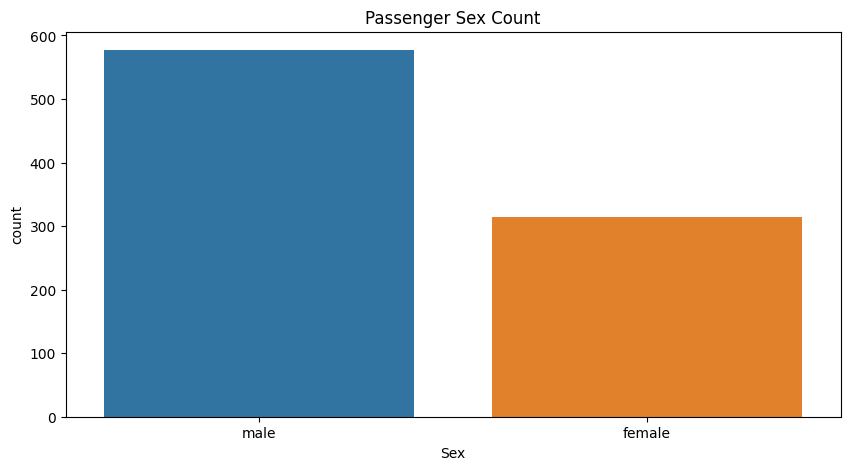

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', data=Dataset)
plt.title('Passenger Sex Count')
plt.show()

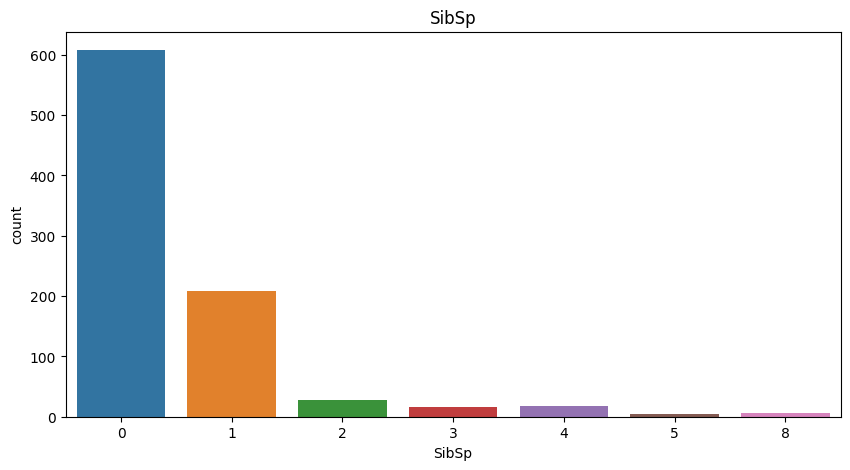

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp', data=Dataset)
plt.title('SibSp')
plt.show()

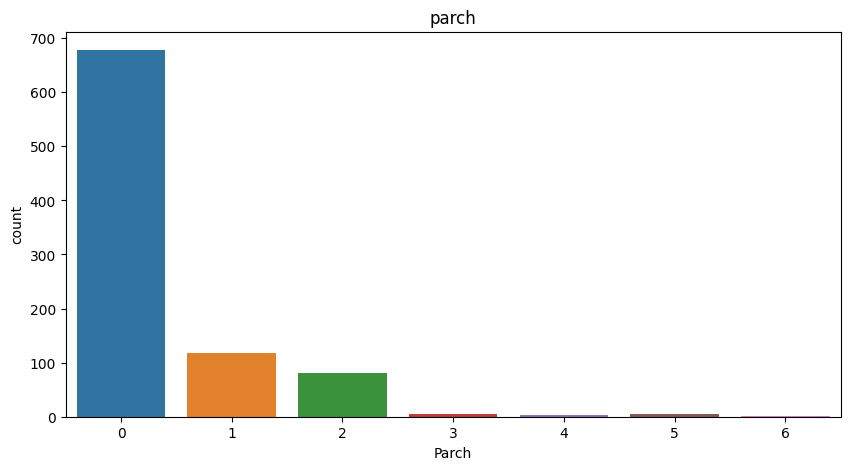

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch', data=Dataset)
plt.title('parch')
plt.show()

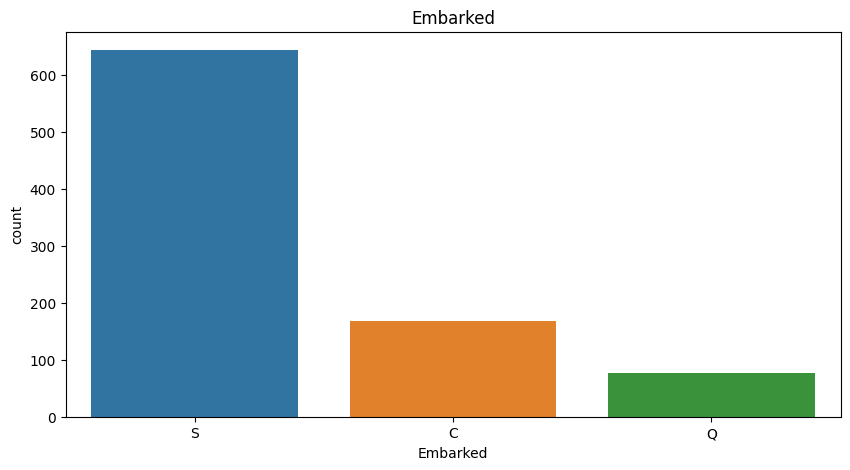

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', data=Dataset)
plt.title('Embarked')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

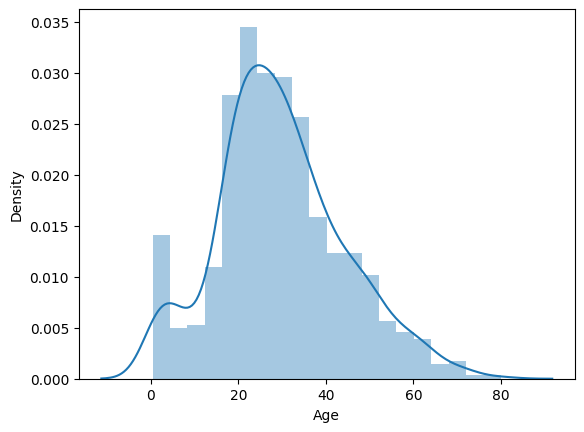

In [11]:
## numerical attributes
sns.distplot(Dataset['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

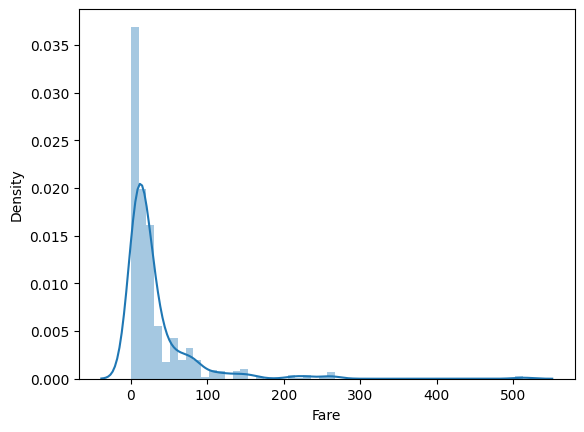

In [12]:
sns.distplot(Dataset['Fare'])

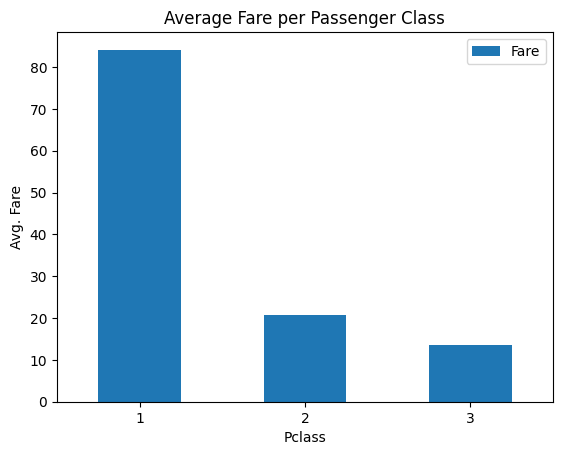

In [13]:
class_fare = Dataset.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.title('Average Fare per Passenger Class')
plt.show()

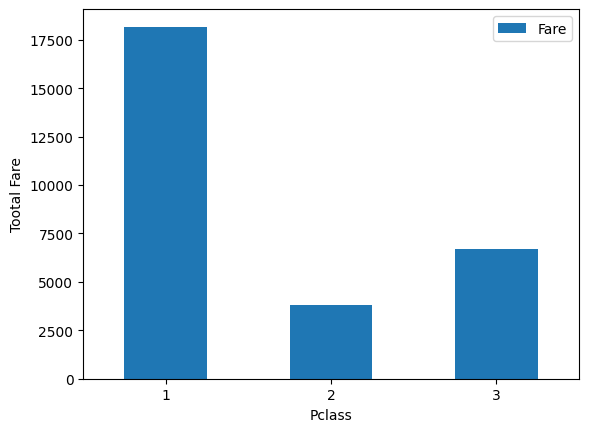

In [14]:
class_fare = Dataset.pivot_table(index='Pclass', values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Tootal Fare')
plt.xticks(rotation=0)
plt.show()

## Data Preprocessing

In [15]:
Dataset=Dataset.reset_index(drop= True)
Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
Dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
##find the null values 
Dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
Dataset = Dataset.drop(columns=['Cabin'],axis = 1)


In [19]:
Dataset['Age'].mean()

29.69911764705882

In [20]:
# fill the missing values using mean of that numerical column 
Dataset['Age']=Dataset['Age'].fillna(Dataset['Age'].mean())
Dataset['Fare']=Dataset['Fare'].fillna(Dataset['Fare'].mean())

In [21]:
Dataset['Embarked'].mode()[0]

'S'

In [22]:
#fill the missing values using mean of that categorical column 
Dataset['Embarked']=Dataset['Embarked'].fillna(Dataset['Embarked'].mode()[0])

## Log Transformation for Uniform data distribution

<Axes: xlabel='Fare', ylabel='Density'>

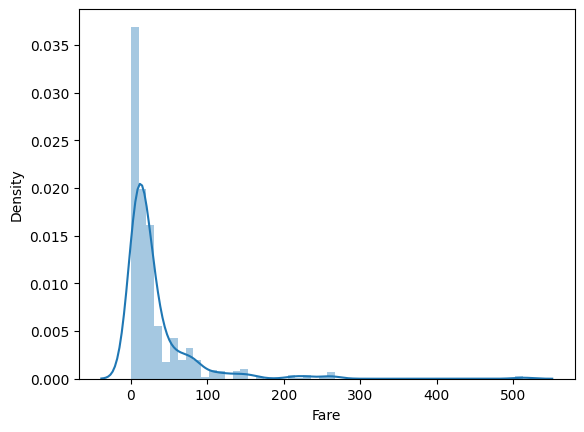

In [23]:
sns.distplot(Dataset['Fare'])

In [24]:
Dataset['Fare'] = np.log(Dataset['Fare'] + 1)


<Axes: xlabel='Fare', ylabel='Density'>

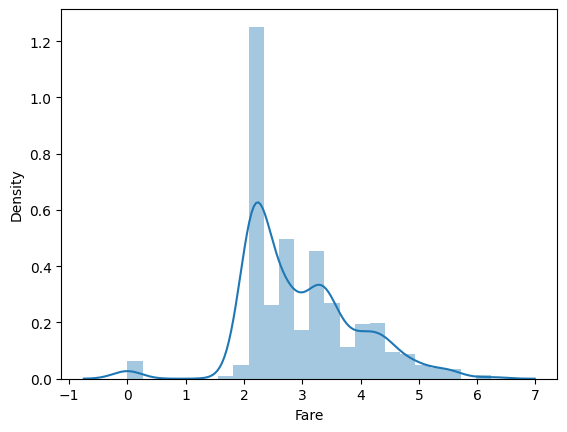

In [25]:
sns.distplot(Dataset['Fare'])

## Train Test Split

In [26]:
Dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [27]:
Dataset.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
Dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,2.110213,S
1,1,1,female,38.000000,1,0,4.280593,C
2,1,3,female,26.000000,0,0,2.188856,S
3,1,1,female,35.000000,1,0,3.990834,S
4,0,3,male,35.000000,0,0,2.202765,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,2.639057,S
887,1,1,female,19.000000,0,0,3.433987,S
888,0,3,female,29.699118,1,2,3.196630,S
889,1,1,male,26.000000,0,0,3.433987,C


In [28]:
label_encoder = LabelEncoder()
Dataset['Sex'] = label_encoder.fit_transform(Dataset['Sex'])
Dataset['Embarked'] = label_encoder.fit_transform(Dataset['Embarked'])

In [29]:
Dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,2.110213,2
1,1,1,0,38.000000,1,0,4.280593,0
2,1,3,0,26.000000,0,0,2.188856,2
3,1,1,0,35.000000,1,0,3.990834,2
4,0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2.639057,2
887,1,1,0,19.000000,0,0,3.433987,2
888,0,3,0,29.699118,1,2,3.196630,2
889,1,1,1,26.000000,0,0,3.433987,0


In [30]:
X = Dataset.drop(columns='Survived',axis=1)
Y = Dataset['Survived']

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,2.110213,2
1,1,0,38.000000,1,0,4.280593,0
2,3,0,26.000000,0,0,2.188856,2
3,1,0,35.000000,1,0,3.990834,2
4,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,2.639057,2
887,1,0,19.000000,0,0,3.433987,2
888,3,0,29.699118,1,2,3.196630,2
889,1,1,26.000000,0,0,3.433987,0


In [32]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [33]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [34]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
826,3,1,29.699118,0,0,4.051712,2
838,3,1,32.000000,0,0,4.051712,2
763,1,0,36.000000,1,2,4.795791,2
189,3,1,36.000000,0,0,2.185579,2
109,3,0,29.699118,1,0,3.224858,1
...,...,...,...,...,...,...,...
277,2,1,29.699118,0,0,0.000000,2
817,2,1,31.000000,1,1,3.637697,0
255,3,0,29.000000,0,2,2.787834,0
320,3,1,22.000000,0,0,2.110213,2


In [35]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
770,3,1,24.000000,0,0,2.351375,2
853,1,0,16.000000,0,1,3.698830,2
144,2,1,18.000000,0,0,2.525729,2
141,3,0,22.000000,0,0,2.169054,2
261,3,1,3.000000,4,2,3.477773,2
...,...,...,...,...,...,...,...
71,3,0,16.000000,5,2,3.869116,2
423,3,0,28.000000,1,1,2.734368,2
342,2,1,28.000000,0,0,2.639057,2
825,3,1,29.699118,0,0,2.073172,1


In [36]:
Y_train

826    0
838    1
763    1
189    0
109    1
      ..
277    0
817    0
255    1
320    0
836    0
Name: Survived, Length: 712, dtype: int64

In [37]:
y_test

770    0
853    1
144    0
141    1
261    1
      ..
71     0
423    0
342    0
825    0
293    0
Name: Survived, Length: 179, dtype: int64

## Correlation Matrix

In [38]:
corrcolumns = Dataset.drop(columns=['Embarked','Sex'])
corrcolumns

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,2.110213
1,1,1,38.000000,1,0,4.280593
2,1,3,26.000000,0,0,2.188856
3,1,1,35.000000,1,0,3.990834
4,0,3,35.000000,0,0,2.202765
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,2.639057
887,1,1,19.000000,0,0,3.433987
888,0,3,29.699118,1,2,3.196630
889,1,1,26.000000,0,0,3.433987


In [39]:
corrcolumns.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.329862
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.661022
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.102485
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.318528
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.332186
Fare,0.329862,-0.661022,0.102485,0.318528,0.332186,1.000000


<Axes: >

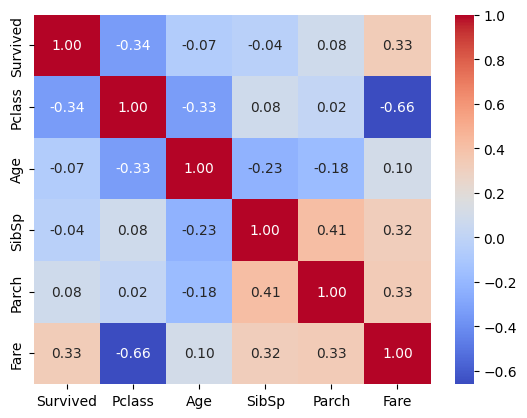

In [40]:
sns.heatmap(corrcolumns.corr(), annot=True, cmap='coolwarm', fmt=".2f")

## Model Training

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
#classify column
def classify(model,X,Y):
    X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state=42)
    model.fit(X_train,Y_train)
    print('Accuracy:',model.score(x_test,y_test))
    
    score=cross_val_score(model,X,Y,cv=5)
    print('CV Score:',np.mean(score))

In [42]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model,X,Y)

Accuracy: 0.8071748878923767
CV Score: 0.7833971502102819


In [43]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model,X,Y)

Accuracy: 0.7399103139013453
CV Score: 0.7643399661038227


In [44]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
classify(model,X,Y)

Accuracy: 0.7982062780269058
CV Score: 0.8058690603226413


In [45]:
from xgboost import XGBClassifier
model= XGBClassifier()
classify(model,X,Y)


Accuracy: 0.7847533632286996
CV Score: 0.8148327160881301


In [46]:
from lightgbm import LGBMClassifier
model =LGBMClassifier(verbose=0)
classify(model,X,Y)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [47]:
from catboost import CatBoostClassifier
model= CatBoostClassifier(verbose=0)
classify(model,X,Y)

Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


## Complete Model Training with full Data

In [48]:
model=LGBMClassifier()
model.fit(X,Y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [49]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
770,3,1,24.0,0,0,2.351375,2
853,1,0,16.0,0,1,3.698830,2
144,2,1,18.0,0,0,2.525729,2
141,3,0,22.0,0,0,2.169054,2
261,3,1,3.0,4,2,3.477773,2


In [50]:
pred= model.predict(x_test)
pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0])

In [51]:
y_test.values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0])

In [52]:
model.score(x_test, y_test)

0.9217877094972067

In [53]:
model.score(X_train, Y_train)

0.9550561797752809

## Model Evaluation

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
confusion_matrix(y_test,pred)

array([[109,   1],
       [ 13,  56]])

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       110
           1       0.98      0.81      0.89        69

    accuracy                           0.92       179
   macro avg       0.94      0.90      0.91       179
weighted avg       0.93      0.92      0.92       179

